In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams['font.family'] = 'NanumGothicCoding'

# 경기도 5년 화재 발생 현황

## 화재 발생 건수
* 아래 건수는 소방청에서 공개한 지역별 실제 화재 발생 건수를 바탕으로 함.
* 화성시는 경기도 내에서 가장 많은 화재가 발생한 시로 평균 화재 발생 건수보다 138.3% 더 높은 수치를 보임.

In [39]:
# 원본 데이터
data = {
    "지역": [
        "수원시 장안구", "수원시 권선구", "수원시 팔달구", "수원시 영통구",
        "성남시 수정구", "성남시 중원구", "성남시 분당구",
        "의정부시", "안양시 만안구", "안양시 동안구",
        "부천시", "부천시 원미구", "부천시 소사구", "부천시 오정구",
        "광명시", "평택시", "동두천시", "안산시 상록구", "안산시 단원구",
        "고양시 덕양구", "고양시 일산동", "고양시 일산서",
        "과천시", "구리시", "남양주시", "오산시", "시흥시", "의왕시", "군포시", "하남시",
        "용인시 처인구", "용인시 기흥구", "용인시 수지구",
        "파주시", "이천시", "안성시", "김포시", "화성시", "광주시", "양주시", "포천시",
        "여주시", "연천군", "가평군", "양평군"
    ],
    "건수": [
        446, 690, 512, 471,
        718, 594, 984,
        1035, 514, 515,
        1243, 175, 82, 118,
        722, 2201, 439, 828, 1238,
        985, 701, 448,
        194, 513, 1925, 598, 1597, 503, 646, 941,
        1164, 678, 373,
        1665, 1170, 1210, 1903, 3177, 1616, 1287, 1350,
        972, 479, 681, 1025
    ]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 시 단위로 통합하기 위한 전처리 (앞의 시 이름만 추출)
df["시"] = df["지역"].apply(lambda x: x.split()[0])

# 시별로 건수 합산
df_grouped = df.groupby("시", as_index=False)["건수"].sum()

# 내림차순 정렬
df_sorted = df_grouped.sort_values(by="건수", ascending=False)

# 화성시 비중 및 평균 비교
hwaseong_count = df_sorted[df_sorted["시"] == "화성시"]["건수"].values[0]
avg_count = df_sorted["건수"].mean()
percent_above_avg = (hwaseong_count - avg_count) / avg_count * 100

import ace_tools_open as tools; tools.display_dataframe_to_user(name="시별 화재 건수 정리", dataframe=df_sorted)

(hwaseong_count, avg_count, percent_above_avg)

시별 화재 건수 정리


(3177, 1333.0967741935483, 138.31728209843683)

## 최초착화물에 따른 재산피해와 빈도수

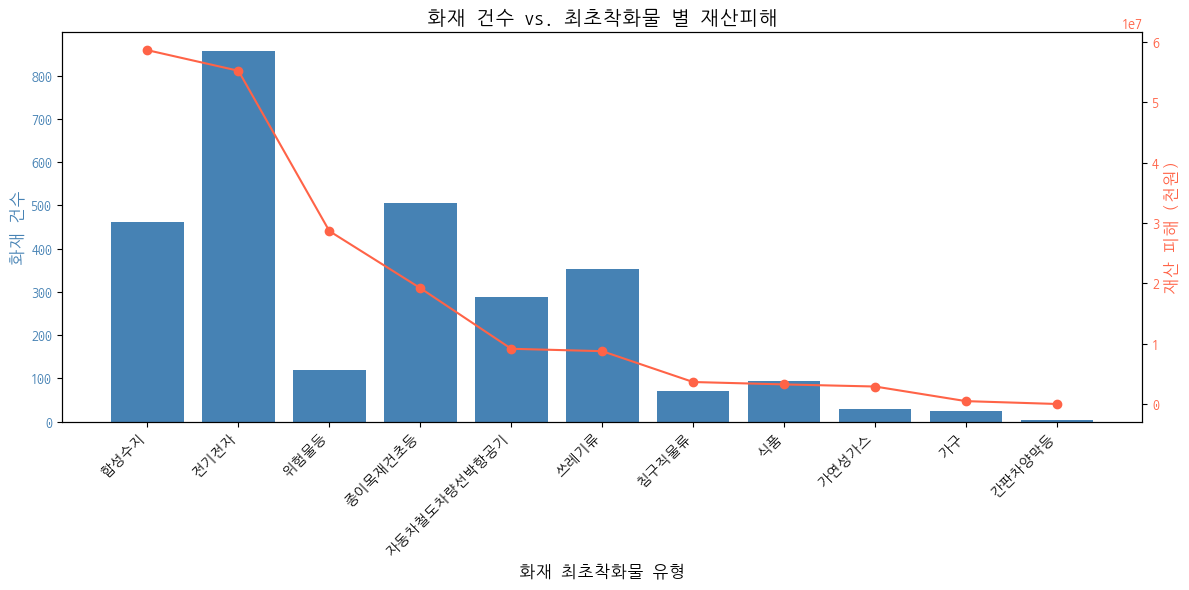

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
csv_path = "data/최초착화물.csv"
df = pd.read_csv(csv_path)

# 소계 기준 데이터 추출
damage_df = df[df["Unnamed: 1"] == "소계"].copy()
damage_df = damage_df[["구분", "화재건수", "부동산피해(천원)", "재산피해(천원)"]]
damage_df.columns = ["Category", "Fire Cases", "Real Estate Damage", "Movable Property Damage"]
damage_df["Total Damage"] = damage_df["Real Estate Damage"] + damage_df["Movable Property Damage"]

# ✅ "미상", "기타" 제거
damage_df_cleaned = damage_df[~damage_df["Category"].isin(["미상", "기타"])].copy()
damage_df_cleaned = damage_df_cleaned.sort_values(by="Total Damage", ascending=False)

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대: 화재 건수
ax1.bar(damage_df_cleaned["Category"], damage_df_cleaned["Fire Cases"], color="steelblue", label="Fire Cases")
ax1.set_ylabel("화재 건수", fontsize=12, color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")

# 꺾은선: 총 피해액
ax2 = ax1.twinx()
ax2.plot(damage_df_cleaned["Category"], damage_df_cleaned["Total Damage"], color="tomato", marker='o', label="Total Damage")
ax2.set_ylabel("재산 피해 (천원)", fontsize=12, color="tomato")
ax2.tick_params(axis="y", labelcolor="tomato")

# x축 회전
ax1.set_xlabel("화재 최초착화물 유형", fontsize=12)
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

plt.title("화재 건수 vs. 최초착화물 별 재산피해", fontsize=14)
fig.tight_layout()
plt.show()

# 화성시 입주기업 현황

## 데이터 로드

In [41]:
df = pd.read_csv('data/2024년도_4분기_산업단지_입주기업_현황.csv',index_col=0)
df

,단지명,회사명,"공장대표주소(지번, 도로명 주소)",업종번호,업종명,대표번호,비고
순번,,,,,,,
1,화성동탄일반산업단지,(주)21세기,경기도 화성시 방교동 846-6번지,"29222, 29223",디지털 적층 성형기계 제조업 외 1 종,031-353-3155,NaN
2,화성동탄일반산업단지,(주)가온솔루션,경기도 화성시 방교동 875-3번지,"29271, 29272",반도체 제조용 기계 제조업 외 1 종,031-273-4523,NaN
3,화성동탄일반산업단지,(주)경진티알엠,경기도 화성시 방교동 832-4번지,"29171, 29172",산업용 냉장 및 냉동 장비 제조업 외 1 종,031-375-3977,NaN
4,화성동탄일반산업단지,(주)고성엔지니어링,경기도 화성시 방교동 842-5,26299,그 외 기타 전자부품 제조업,070-7596-2345,NaN
5,화성동탄일반산업단지,(주)고송이엔지,경기도 화성시 방교동 836-4번지,29271,반도체 제조용 기계 제조업,070-4361-2519,NaN
...,...,...,...,...,...,...,...
1936,화성동탄도시첨단산업단지,"혜종-524,525",경기도 화성시 영천동 204-3 5층 524호,68112,비주거용 건물 임대업,NaN,NaN
1937,화성동탄도시첨단산업단지,화원,경기도 화성시 영천동 204-3번지 3층 304,68112,비주거용 건물 임대업,NaN,NaN
1938,화성동탄도시첨단산업단지,후렉스산업,경기도 화성시 영천동 193-2번지 5층 513,25999,그 외 기타 분류 안된 금속 가공 제품 제조업,031-260-4601,NaN


In [42]:
df.columns

Index(['단지명', '회사명', '공장대표주소(지번, 도로명 주소)', '업종번호', '업종명', '대표번호', '비고'], dtype='object')

## 데이터 전처리

In [43]:
print(f"전체 행 개수: {len(df)}")
print(f"null 행 개수: {len(df['비고'].isnull())}")

전체 행 개수: 1940
null 행 개수: 1940


In [44]:
df = df[['단지명','회사명','공장대표주소(지번, 도로명 주소)', '업종번호', '업종명', '대표번호']] #비고 열 제거
df

,단지명,회사명,"공장대표주소(지번, 도로명 주소)",업종번호,업종명,대표번호
순번,,,,,,
1,화성동탄일반산업단지,(주)21세기,경기도 화성시 방교동 846-6번지,"29222, 29223",디지털 적층 성형기계 제조업 외 1 종,031-353-3155
2,화성동탄일반산업단지,(주)가온솔루션,경기도 화성시 방교동 875-3번지,"29271, 29272",반도체 제조용 기계 제조업 외 1 종,031-273-4523
3,화성동탄일반산업단지,(주)경진티알엠,경기도 화성시 방교동 832-4번지,"29171, 29172",산업용 냉장 및 냉동 장비 제조업 외 1 종,031-375-3977
4,화성동탄일반산업단지,(주)고성엔지니어링,경기도 화성시 방교동 842-5,26299,그 외 기타 전자부품 제조업,070-7596-2345
5,화성동탄일반산업단지,(주)고송이엔지,경기도 화성시 방교동 836-4번지,29271,반도체 제조용 기계 제조업,070-4361-2519
...,...,...,...,...,...,...
1936,화성동탄도시첨단산업단지,"혜종-524,525",경기도 화성시 영천동 204-3 5층 524호,68112,비주거용 건물 임대업,NaN
1937,화성동탄도시첨단산업단지,화원,경기도 화성시 영천동 204-3번지 3층 304,68112,비주거용 건물 임대업,NaN
1938,화성동탄도시첨단산업단지,후렉스산업,경기도 화성시 영천동 193-2번지 5층 513,25999,그 외 기타 분류 안된 금속 가공 제품 제조업,031-260-4601


## 산업단지별 회사개수 통계
* 발안일반산업단지, 동탄일반산업단지, 동탄도시첨단산업단지가 회사가 가장 많음.

In [45]:
count_company_df = df.groupby('단지명').count().sort_values("회사명", ascending = False)
count_company_df = count_company_df.rename(columns={"회사명": "회사수"})
count_company_df[["회사수"]].to_csv("data/산업단지별_회사수.csv", encoding='utf-8-sig')

count_company_df

,회사수,"공장대표주소(지번, 도로명 주소)",업종번호,업종명,대표번호
단지명,,,,,
화성발안일반산업단지,424,424,424,424,369
화성동탄일반산업단지,328,328,328,328,303
화성동탄도시첨단산업단지,251,251,251,251,124
화성전곡해양일반산업단지,233,233,233,233,218
화성바이오밸리일반산업단지,227,227,227,227,218
화성마도일반산업단지,173,173,173,173,165
화성송산테크노파크일반산업단지,99,99,99,99,91
화성정남일반산업단지,95,95,95,95,94
화성향남제약일반산업단지,48,48,48,48,47


In [46]:
company_df = pd.read_csv("data/산업단지별_회사_데이터.csv", index_col = 0)
company_df

,회사수,면적,직원수
단지명,,,
화성발안일반산업단지,424,1825,8884
화성동탄일반산업단지,328,1974,14237
화성동탄도시첨단산업단지,251,149,3935
화성전곡해양일반산업단지,233,1617,4051
화성바이오밸리일반산업단지,227,1740,4787
화성마도일반산업단지,173,929,4029
화성송산테크노파크일반산업단지,99,529,1513
화성정남일반산업단지,95,569,2956
화성향남제약일반산업단지,48,648,4409


In [47]:
company_df['직원밀집도'] = company_df['직원수'] /  company_df['면적']
company_df['기업밀집도'] = company_df['회사수'] /  company_df['면적']

# 화재 대응(초동 진압, 대피 시간, 인명 피해)에 초점을 맞춘다면 직원:기업 = 7:3 또는 8:2가 적당함.
# 여기서는 7:3을 택함.

alpha = 0.7  # 직원 밀집도 가중치
beta = 0.3   # 기업 밀집도 가중치

company_df["혼합밀집도"] = (company_df["직원밀집도"] * alpha) + (company_df["기업밀집도"] * beta)
company_df

,회사수,면적,직원수,직원밀집도,기업밀집도,혼합밀집도
단지명,,,,,,
화성발안일반산업단지,424,1825,8884,4.867945,0.232329,3.477260
화성동탄일반산업단지,328,1974,14237,7.212259,0.166160,5.098430
화성동탄도시첨단산업단지,251,149,3935,26.409396,1.684564,18.991946
화성전곡해양일반산업단지,233,1617,4051,2.505257,0.144094,1.796908
화성바이오밸리일반산업단지,227,1740,4787,2.751149,0.130460,1.964943
화성마도일반산업단지,173,929,4029,4.336921,0.186222,3.091712
화성송산테크노파크일반산업단지,99,529,1513,2.860113,0.187146,2.058223
화성정남일반산업단지,95,569,2956,5.195079,0.166960,3.686643
화성향남제약일반산업단지,48,648,4409,6.804012,0.074074,4.785031


# 산업단지 별 업종 통계

In [48]:
company_type_df = pd.read_csv("data/산업단지별_업종현황(소방청_연계).csv", index_col = 0)
company_type_df

,위험물등,전기전자,운송장비,목재종이출판,섬유의복,음식료,기타,합계
단지명,,,,,,,,
화성동탄일반산업단지,11,306,9,4,0,0,79,409
화성마도일반산업단지,22,152,23,0,0,0,74,271
화성발안일반산업단지,29,342,7,0,0,0,168,546
화성전곡해양일반산업단지,115,118,14,3,1,4,41,296
화성정남일반산업단지,26,76,0,0,0,4,10,116
화성향남제약일반산업단지,44,1,0,0,0,4,2,51
화성바이오밸리일반산업단지,86,131,20,7,0,4,57,305
화성주곡일반산업단지,5,13,4,3,1,1,7,34
화성화남일반산업단지,0,41,0,0,0,0,1,42


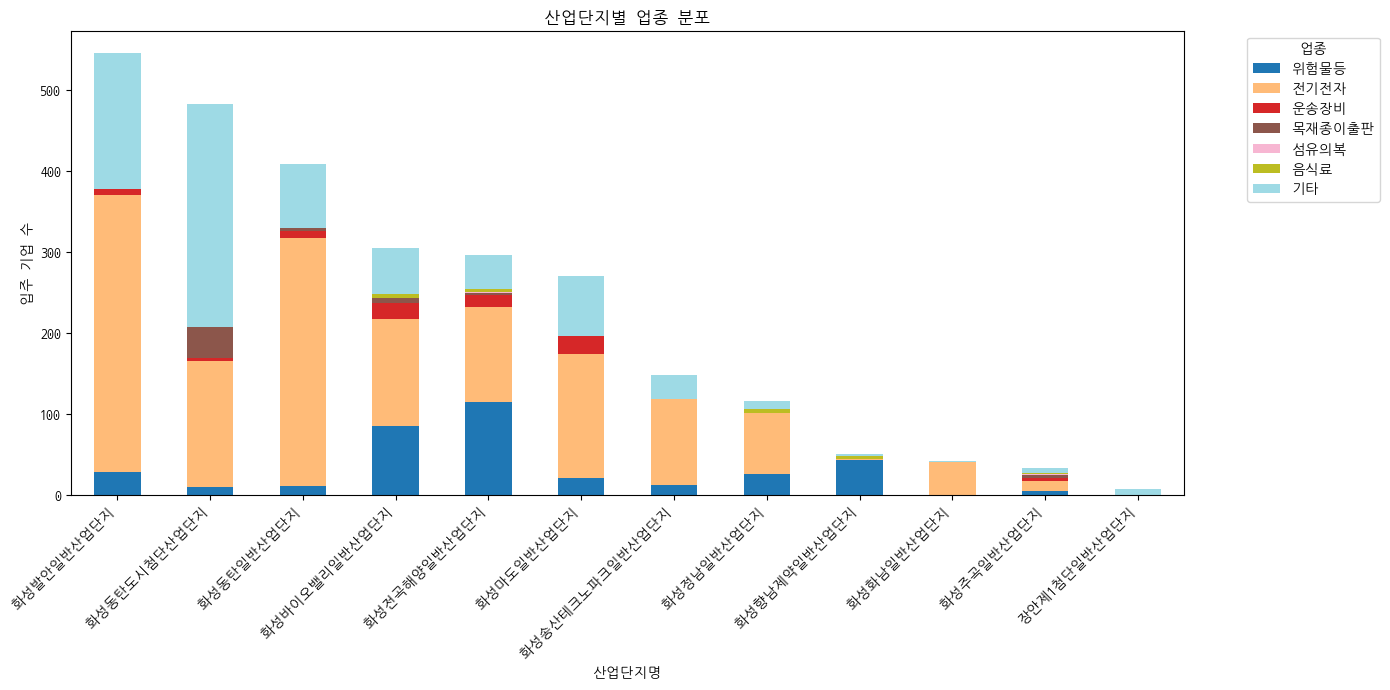

In [49]:
# 합계를 기준으로 내림차순 정렬
sorted_df = company_type_df.drop(columns=["합계"])
sorted_df["총합"] = sorted_df.sum(axis=1)
sorted_df = sorted_df.sort_values(by="총합", ascending=False).drop(columns=["총합"])

# 시각화
sorted_df.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")
plt.title("산업단지별 업종 분포")
plt.xlabel("산업단지명")
plt.ylabel("입주 기업 수")
plt.xticks(rotation=45, ha="right")
plt.legend(title="업종", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


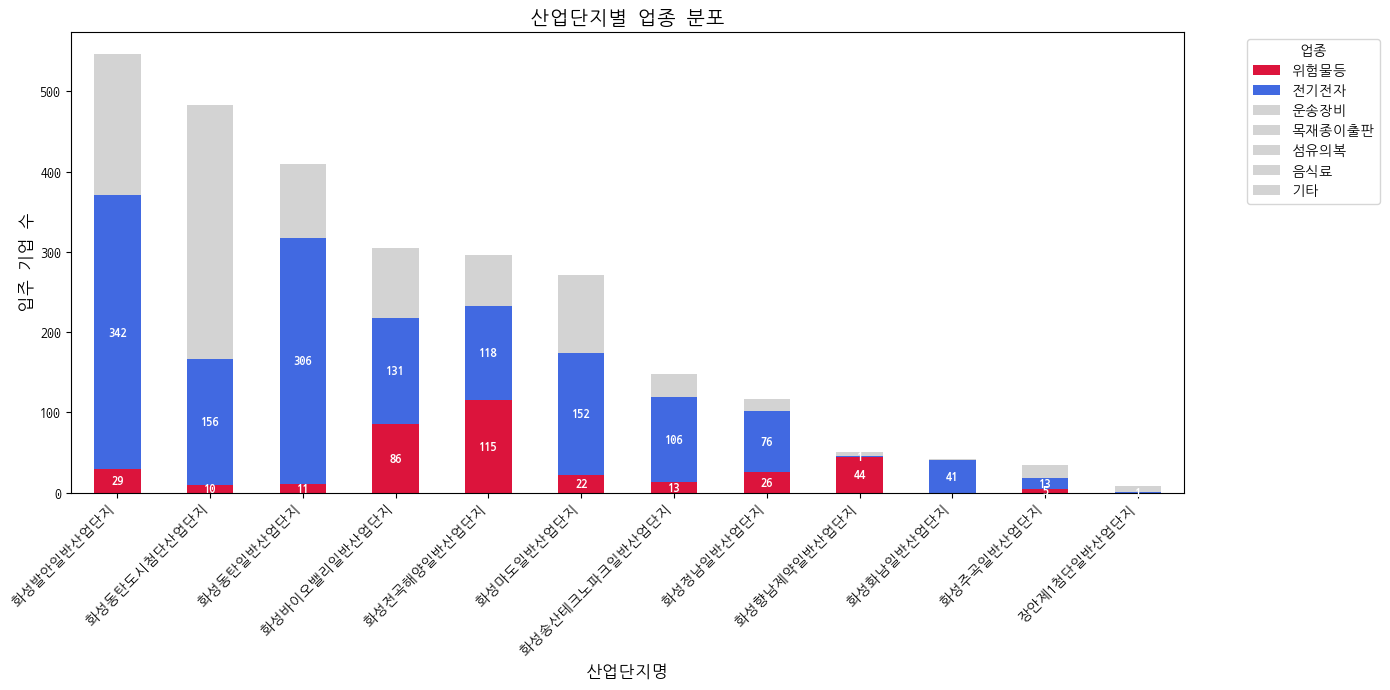

In [50]:
# 강조 업종 수치를 바 그래프 위에 레이블로 표시
fig, ax = plt.subplots(figsize=(14, 7))

# 강조 업종
highlight_sectors = ["전기전자", "위험물등"]

# 색상 설정
color_map = {}
for col in sorted_df.columns:
    if col in highlight_sectors:
        color_map[col] = "crimson" if col == "위험물등" else "royalblue"
    else:
        color_map[col] = "lightgray"

# 누적 막대 그래프
bars = sorted_df.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    color=[color_map[col] for col in sorted_df.columns],
    ax=ax
)

# 레이블 추가 (강조 업종에 한해)
for i, idx in enumerate(sorted_df.index):
    height_offset = 0
    for col in sorted_df.columns:
        height = sorted_df.loc[idx, col]
        if col in highlight_sectors and height > 0:
            ax.text(
                i,
                height_offset + height / 2,
                f"{int(height)}",
                ha='center',
                va='center',
                fontsize=9,
                color='white',
                fontweight='bold'
            )
        height_offset += height

plt.title("산업단지별 업종 분포", fontsize=14)
plt.xlabel("산업단지명", fontsize=12)
plt.ylabel("입주 기업 수", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="업종", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
# 위험 업종 비율 계산 함수
def calculate_dangerous_ratio(row):
    dangerous_count = row["위험물등"] + row["전기전자"]
    total_count = row["합계"]
    ratio = dangerous_count / total_count
    return ratio

# 위험도 단계 설정 함수
def danger_level(ratio):
    if ratio <= 0.2:
        return 1
    elif ratio <= 0.5:
        return 2
    else:
        return 3

# 위험 업종 비율 및 단계 추가
company_type_df["위험 업종 비율"] = company_type_df.apply(calculate_dangerous_ratio, axis=1)
company_type_df["위험 업종 위험 수준"] = company_type_df["위험 업종 비율"].apply(danger_level)

# 위험 업종 비율이 높은 순으로 정렬
company_type_df = company_type_df.sort_values(by=["위험 업종 비율"], ascending=False)

company_type_df

,위험물등,전기전자,운송장비,목재종이출판,섬유의복,음식료,기타,합계,위험 업종 비율,위험 업종 위험 수준
단지명,,,,,,,,,,
화성화남일반산업단지,0,41,0,0,0,0,1,42,0.976190,3
화성향남제약일반산업단지,44,1,0,0,0,4,2,51,0.882353,3
화성정남일반산업단지,26,76,0,0,0,4,10,116,0.879310,3
화성송산테크노파크일반산업단지,13,106,0,0,0,0,29,148,0.804054,3
화성전곡해양일반산업단지,115,118,14,3,1,4,41,296,0.787162,3
화성동탄일반산업단지,11,306,9,4,0,0,79,409,0.775061,3
화성바이오밸리일반산업단지,86,131,20,7,0,4,57,305,0.711475,3
화성발안일반산업단지,29,342,7,0,0,0,168,546,0.679487,3
화성마도일반산업단지,22,152,23,0,0,0,74,271,0.642066,3


# 소방서와 산업단지의 거리 계산

In [52]:
company_address_df = pd.read_csv("data/화성시_내_산업단지주소.csv", index_col = 0)
company_address_df

,주소
단지명,
화성동탄일반산업단지,경기 화성시 동탄산단6길 15-37
화성마도일반산업단지,경기 화성시 마도면 마도공단로5길 35
화성발안일반산업단지,경기 화성시 향남읍 발안공단로4길 21
화성전곡해양일반산업단지,경기 화성시 서신면 전곡산단로 141
화성정남일반산업단지,경기 화성시 정남면 정남산단3길 37
화성향남제약일반산업단지,경기 화성시 향남읍 제약공단2길 45
화성바이오밸리일반산업단지,경기 화성시 마도면 청원산단3길 140-32
화성주곡일반산업단지,경기 화성시 우정읍 버들로 899-87
화성화남일반산업단지,경기 화성시 서신면 화남공단로 48-11


In [53]:
firestation_address_df = pd.read_csv("data/화성시_내_소방서_주소.csv", index_col = 0)
firestation_address_df

,주소
소방서명,
향남119안전센터,화성시 향남읍 향남로 399
태안119안전센터,화성시 병점중앙로 148 (진안동)
반송119안전센터,화성시 동탄반석로 188 (반송동)
봉담119안전센터,화성시 봉담읍 샘마을1길 9 (상리)
남양119안전센터,화성시 남양시장로 48 (남양읍)
정남119안전센터,화성시 정남면 정남동로 514 (고지리)
장안119안전센터,화성시 장안면 3.1만세로 119 (어은리)
목동119안전센터,화성시 동탄신리천로 359 (동탄4~7동)
팔탄119안전센터,화성시 팔탄면 구장리 557


## Kakao Map API 사용하여 경도와 위도로 변환 (추후 QIGS에 활용)

In [54]:
import requests
import pandas as pd
import time

KAKAO_API_KEY = "f729b918e45e708bfbbf26b3a0a72128" # 위 키는 저희의 개인 API Key로 활용 시 제외해주시기 바랍니다.

# Kakao 주소 → 좌표 변환 함수
def get_latlon_kakao(address, api_key=KAKAO_API_KEY):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {api_key}"}
    params = {"query": address}
    try:
        response = requests.get(url, headers=headers, params=params)
        result = response.json()
        if result["documents"]:
            location = result["documents"][0]["address"]
            return float(location["y"]), float(location["x"])  # 위도, 경도
    except Exception as e:
        print(f"Error for address '{address}': {e}")
    return None, None

In [55]:
company_coords = company_address_df["주소"].apply(lambda x: get_latlon_kakao(x))
firestation_coords = firestation_address_df["주소"].apply(lambda x: get_latlon_kakao(x))

company_address_df[["위도", "경도"]] = pd.DataFrame(company_coords.tolist(), index=company_address_df.index)
firestation_address_df[["위도", "경도"]] = pd.DataFrame(firestation_coords.tolist(), index=firestation_address_df.index)

In [56]:
company_address_df

,주소,위도,경도
단지명,,,
화성동탄일반산업단지,경기 화성시 동탄산단6길 15-37,37.172092,127.088027
화성마도일반산업단지,경기 화성시 마도면 마도공단로5길 35,37.180876,126.790641
화성발안일반산업단지,경기 화성시 향남읍 발안공단로4길 21,37.083222,126.907938
화성전곡해양일반산업단지,경기 화성시 서신면 전곡산단로 141,37.188534,126.672069
화성정남일반산업단지,경기 화성시 정남면 정남산단3길 37,37.145270,127.026804
화성향남제약일반산업단지,경기 화성시 향남읍 제약공단2길 45,37.091714,126.905752
화성바이오밸리일반산업단지,경기 화성시 마도면 청원산단3길 140-32,37.170292,126.769581
화성주곡일반산업단지,경기 화성시 우정읍 버들로 899-87,37.118453,126.811920
화성화남일반산업단지,경기 화성시 서신면 화남공단로 48-11,37.159588,126.672474


In [57]:
firestation_address_df

,주소,위도,경도
소방서명,,,
향남119안전센터,화성시 향남읍 향남로 399,37.131011,126.920621
태안119안전센터,화성시 병점중앙로 148 (진안동),37.211179,127.038997
반송119안전센터,화성시 동탄반석로 188 (반송동),37.205462,127.072089
봉담119안전센터,화성시 봉담읍 샘마을1길 9 (상리),37.219349,126.949928
남양119안전센터,화성시 남양시장로 48 (남양읍),37.208697,126.814650
정남119안전센터,화성시 정남면 정남동로 514 (고지리),37.165097,127.002281
장안119안전센터,화성시 장안면 3.1만세로 119 (어은리),37.086348,126.826113
목동119안전센터,화성시 동탄신리천로 359 (동탄4~7동),37.183800,127.118212
팔탄119안전센터,화성시 팔탄면 구장리 557,37.160961,126.905185


## Kakao Map API를 이용한 산업단지별 소방서 거리 측정 (실제 도로를 따라 측정한 거리)

In [58]:
import requests

def get_road_distance_kakao(start_lon, start_lat, end_lon, end_lat, api_key):
    url = "https://apis-navi.kakaomobility.com/v1/directions"
    headers = {"Authorization": f"KakaoAK {api_key}"}
    params = {
        "origin": f"{start_lon},{start_lat}",
        "destination": f"{end_lon},{end_lat}",
        "priority": "RECOMMEND"
    }
    try:
        response = requests.get(url, headers=headers, params=params)
        data = response.json()
        if "routes" in data and len(data["routes"]) > 0:
            distance_m = data["routes"][0]["summary"]["distance"]
            return distance_m / 1000  # m → km
    except Exception as e:
        print(f"[ERROR] API failed: {e}")
    return None


In [59]:
def find_nearest_firestation(company_df, firestation_df, api_key):
    results = []

    for company_name, company_row in company_df.iterrows():
        min_distance = float("inf")
        nearest_station = None

        for fire_name, fire_row in firestation_df.iterrows():
            road_dist = get_road_distance_kakao(
                start_lon=company_row["경도"], start_lat=company_row["위도"],
                end_lon=fire_row["경도"], end_lat=fire_row["위도"],
                api_key=api_key
            )

            if road_dist is not None and road_dist < min_distance:
                min_distance = road_dist
                nearest_station = fire_name

        results.append((company_name, nearest_station, round(min_distance, 2) if min_distance < float("inf") else None))

    # 결과 데이터프레임 생성
    result_df = pd.DataFrame(results, columns=["산업단지명", "가까운 소방서명", "소방 도로 거리 (km)"]).set_index("산업단지명")
    return result_df

result_df = find_nearest_firestation(company_address_df, firestation_address_df, KAKAO_API_KEY)

In [60]:
# 위험 수준 분류 함수
def classify_risk(distance):
    if distance < 3:
        return 1
    elif distance < 5:
        return 2
    else:
        return 3

# 위험 수준 컬럼 추가
result_df["소방 거리 기준 위험 수준"] = result_df["소방 도로 거리 (km)"].apply(classify_risk)

# 결과 확인
result_df

,가까운 소방서명,소방 도로 거리 (km),소방 거리 기준 위험 수준
산업단지명,,,
화성동탄일반산업단지,목동119안전센터,4.19,2
화성마도일반산업단지,남양119안전센터,5.36,3
화성발안일반산업단지,향남119안전센터,6.41,3
화성전곡해양일반산업단지,제부119지역대,6.91,3
화성정남일반산업단지,정남119안전센터,4.43,2
화성향남제약일반산업단지,향남119안전센터,5.00,3
화성바이오밸리일반산업단지,남양119안전센터,7.35,3
화성주곡일반산업단지,장안119안전센터,5.75,3
화성화남일반산업단지,제부119지역대,6.70,3


In [61]:
time_df = pd.read_csv("data/산업단지_소방서_소요시간.csv", index_col = 0)
time_df

,가까운 소방서,도로 거리(km),평균 출동 시간
산업단지명,,,
화성동탄일반산업단지,목동119안전센터,4.19,11.625000
화성마도일반산업단지,남양119안전센터,5.36,12.875000
화성발안일반산업단지,향남119안전센터,6.41,13.500000
화성전곡해양일반산업단지,제부119지역대,6.91,18.708330
화성정남일반산업단지,정남119안전센터,4.43,8.541667
화성향남제약일반산업단지,향남119안전센터,5.00,11.875000
화성바이오밸리일반산업단지,남양119안전센터,7.35,21.875000
화성주곡일반산업단지,장안119안전센터,6.11,14.000000
화성화남일반산업단지,제부119지역대,6.70,12.583330


In [62]:
def classify_risk(time):
    if time < 10:
        return 1
    elif time < 15:
        return 2
    else:
        return 3

# 위험 수준 컬럼 추가
time_df["출동 시간 기준 위험 수준"] = time_df["평균 출동 시간"].apply(classify_risk)

# 결과 확인
time_df

,가까운 소방서,도로 거리(km),평균 출동 시간,출동 시간 기준 위험 수준
산업단지명,,,,
화성동탄일반산업단지,목동119안전센터,4.19,11.625000,2
화성마도일반산업단지,남양119안전센터,5.36,12.875000,2
화성발안일반산업단지,향남119안전센터,6.41,13.500000,2
화성전곡해양일반산업단지,제부119지역대,6.91,18.708330,3
화성정남일반산업단지,정남119안전센터,4.43,8.541667,1
화성향남제약일반산업단지,향남119안전센터,5.00,11.875000,2
화성바이오밸리일반산업단지,남양119안전센터,7.35,21.875000,3
화성주곡일반산업단지,장안119안전센터,6.11,14.000000,2
화성화남일반산업단지,제부119지역대,6.70,12.583330,2


# 소방 거리 기준 위험 수준과 출동 시간 기준 위험 수준이 다름을 확인
- 일부에서 위 기준에 대한 값이 다름을 확인
- 즉, 거리가 멀어도 도로 상황에 따라 다를 수 있음

In [63]:
result_df['출동 시간 기준 위험 수준'] = time_df['출동 시간 기준 위험 수준']
result_df

,가까운 소방서명,소방 도로 거리 (km),소방 거리 기준 위험 수준,출동 시간 기준 위험 수준
산업단지명,,,,
화성동탄일반산업단지,목동119안전센터,4.19,2,2
화성마도일반산업단지,남양119안전센터,5.36,3,2
화성발안일반산업단지,향남119안전센터,6.41,3,2
화성전곡해양일반산업단지,제부119지역대,6.91,3,3
화성정남일반산업단지,정남119안전센터,4.43,2,1
화성향남제약일반산업단지,향남119안전센터,5.00,3,2
화성바이오밸리일반산업단지,남양119안전센터,7.35,3,3
화성주곡일반산업단지,장안119안전센터,5.75,3,2
화성화남일반산업단지,제부119지역대,6.70,3,2


## kakao map api를 이용하여 산/산림 존재 여부 판단 및 도로 접근성 평가
* 선행 연구를 통해 1km 이내에 존재 시 위험도가 높은 것으로 평가.
* 도로 접근성의 경우 선행 연구에 따라 5km 이내에 큰 도로 (고속도로)가 존재시에 접근성이 좋은 것으로 판단.

In [64]:
import requests

headers = {
    "Authorization": f"KakaoAK {KAKAO_API_KEY}"
}

# 함수 2: 도로 접근성 평가 (예: '고속도로입구' 키워드 기준)
def get_road_distance(lat, lon):
    url = "https://dapi.kakao.com/v2/local/search/keyword.json"
    params = {
        "query": "고속도로",
        "x": lon,
        "y": lat,
        "radius": 20000,  # 반경을 넓혀 모든 고속도로를 탐색
        "size": 1,
        "sort": "distance"
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    if data["documents"]:
        return float(data["documents"][0]["distance"]) / 1000  # km
    else:
        return None  # 접근 가능한 고속도로가 없을 경우 None 반환

# 평가 적용
def evaluate_environment(df):
    road_distances = []

    for idx, row in df.iterrows():
        lat = row["위도"]
        lon = row["경도"]
        road_distance = get_road_distance(lat, lon)

        # None인 경우를 대비하여 처리
        if road_distance is None:
            road_distance = -1  # 접근 불가를 의미하는 값으로 -1 사용

        road_distances.append(road_distance)

    df["고속도로 접근 거리(km)"] = road_distances
    return df

# 평가 적용
company_address_df = evaluate_environment(company_address_df)

# 기존 result_df에 병합
result_df = result_df.merge(company_address_df[["고속도로 접근 거리(km)"]], 
                            left_index=True, right_index=True)

result_df

,가까운 소방서명,소방 도로 거리 (km),소방 거리 기준 위험 수준,출동 시간 기준 위험 수준,고속도로 접근 거리(km)
화성동탄일반산업단지,목동119안전센터,4.19,2,2,3.339
화성마도일반산업단지,남양119안전센터,5.36,3,2,3.176
화성발안일반산업단지,향남119안전센터,6.41,3,2,7.664
화성전곡해양일반산업단지,제부119지역대,6.91,3,3,7.690
화성정남일반산업단지,정남119안전센터,4.43,2,1,2.121
화성향남제약일반산업단지,향남119안전센터,5.00,3,2,7.886
화성바이오밸리일반산업단지,남양119안전센터,7.35,3,3,3.432
화성주곡일반산업단지,장안119안전센터,5.75,3,2,1.139
화성화남일반산업단지,제부119지역대,6.70,3,2,9.172
화성송산테크노파크일반산업단지,송산119지역대,5.39,3,2,5.271


In [65]:
# 공통 검색 함수
def search_places(query, lat, lon, radius=1000):
    url = "https://dapi.kakao.com/v2/local/search/keyword.json"
    params = {
        "query": query,
        "x": lon,
        "y": lat,
        "radius": radius,
        "size": 15,
        "sort": "distance"
    }
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json().get("documents", [])
    else:
        return []

# 산림형 공원 분류 기준 키워드
forest_keywords = ["산", "자연", "생태", "숲", "수목"]
def is_forest_park(name):
    return any(keyword in name for keyword in forest_keywords)

# 분석 함수
def analyze_surroundings(df):
    park_counts = []
    sensitive_counts = []
    river_counts = []

    for idx, row in df.iterrows():
        lat, lon = row["위도"], row["경도"]

        # 1. 산림형 공원 개수
        parks = search_places("공원", lat, lon)
        forest_parks = [p for p in parks if is_forest_park(p["place_name"])]
        park_coords = {(p["x"], p["y"]) for p in forest_parks}
        park_counts.append(len(park_coords))

        # 2. 민감시설 개수
        sensitive_keywords = ["어린이집", "유치원", "초등학교", "병원", "노인요양"]
        sensitive_places = []
        for keyword in sensitive_keywords:
            sensitive_places += search_places(keyword, lat, lon)
        sensitive_coords = {(p["x"], p["y"]) for p in sensitive_places}
        sensitive_counts.append(len(sensitive_coords))

        # 3. 수변 요소 개수
        river_keywords = ["하천", "강", "바다"]
        river_places = []
        for keyword in river_keywords:
            river_places += search_places(keyword, lat, lon)
        river_coords = {(p["x"], p["y"]) for p in river_places}
        river_counts.append(len(river_coords))

    # 결과 컬럼 추가
    df["산림형 공원 수"] = park_counts
    df["민감시설 수"] = sensitive_counts
    df["수변 요소 수"] = river_counts
    return df

# 분석 실행
company_address_df = analyze_surroundings(company_address_df)

# result_df에 병합
result_df = result_df.merge(
    company_address_df[["산림형 공원 수", "민감시설 수", "수변 요소 수"]],
    left_index=True, right_index=True
)

# 결과 확인
result_df

,가까운 소방서명,소방 도로 거리 (km),소방 거리 기준 위험 수준,출동 시간 기준 위험 수준,고속도로 접근 거리(km),산림형 공원 수,민감시설 수,수변 요소 수
화성동탄일반산업단지,목동119안전센터,4.19,2,2,3.339,0,3,1
화성마도일반산업단지,남양119안전센터,5.36,3,2,3.176,0,0,0
화성발안일반산업단지,향남119안전센터,6.41,3,2,7.664,0,2,1
화성전곡해양일반산업단지,제부119지역대,6.91,3,3,7.690,0,0,0
화성정남일반산업단지,정남119안전센터,4.43,2,1,2.121,0,1,0
화성향남제약일반산업단지,향남119안전센터,5.00,3,2,7.886,0,4,2
화성바이오밸리일반산업단지,남양119안전센터,7.35,3,3,3.432,0,0,0
화성주곡일반산업단지,장안119안전센터,5.75,3,2,1.139,0,0,0
화성화남일반산업단지,제부119지역대,6.70,3,2,9.172,0,0,2
화성송산테크노파크일반산업단지,송산119지역대,5.39,3,2,5.271,0,0,0


In [66]:
company_df

,회사수,면적,직원수,직원밀집도,기업밀집도,혼합밀집도
단지명,,,,,,
화성발안일반산업단지,424,1825,8884,4.867945,0.232329,3.477260
화성동탄일반산업단지,328,1974,14237,7.212259,0.166160,5.098430
화성동탄도시첨단산업단지,251,149,3935,26.409396,1.684564,18.991946
화성전곡해양일반산업단지,233,1617,4051,2.505257,0.144094,1.796908
화성바이오밸리일반산업단지,227,1740,4787,2.751149,0.130460,1.964943
화성마도일반산업단지,173,929,4029,4.336921,0.186222,3.091712
화성송산테크노파크일반산업단지,99,529,1513,2.860113,0.187146,2.058223
화성정남일반산업단지,95,569,2956,5.195079,0.166960,3.686643
화성향남제약일반산업단지,48,648,4409,6.804012,0.074074,4.785031


In [67]:
selected_company_df = company_df[["회사수", "면적", "혼합밀집도"]]

merged_df = pd.concat([selected_company_df, result_df], axis=1)

final_df = merged_df.sort_values(by="회사수", ascending=False)

final_df

,회사수,면적,혼합밀집도,가까운 소방서명,소방 도로 거리 (km),소방 거리 기준 위험 수준,출동 시간 기준 위험 수준,고속도로 접근 거리(km),산림형 공원 수,민감시설 수,수변 요소 수
화성발안일반산업단지,424,1825,3.477260,향남119안전센터,6.41,3,2,7.664,0,2,1
화성동탄일반산업단지,328,1974,5.098430,목동119안전센터,4.19,2,2,3.339,0,3,1
화성동탄도시첨단산업단지,251,149,18.991946,반송119안전센터,2.61,1,1,1.380,0,17,5
화성전곡해양일반산업단지,233,1617,1.796908,제부119지역대,6.91,3,3,7.690,0,0,0
화성바이오밸리일반산업단지,227,1740,1.964943,남양119안전센터,7.35,3,3,3.432,0,0,0
화성마도일반산업단지,173,929,3.091712,남양119안전센터,5.36,3,2,3.176,0,0,0
화성송산테크노파크일반산업단지,99,529,2.058223,송산119지역대,5.39,3,2,5.271,0,0,0
화성정남일반산업단지,95,569,3.686643,정남119안전센터,4.43,2,1,2.121,0,1,0
화성향남제약일반산업단지,48,648,4.785031,향남119안전센터,5.00,3,2,7.886,0,4,2
화성화남일반산업단지,36,151,2.199338,제부119지역대,6.70,3,2,9.172,0,0,2


In [68]:
final_df = final_df[['혼합밀집도', '소방 거리 기준 위험 수준', '출동 시간 기준 위험 수준', '고속도로 접근 거리(km)', '산림형 공원 수', '민감시설 수', '수변 요소 수']]
final_df['위험 업종 위험 수준'] = company_type_df['위험 업종 위험 수준']
final_df

/tmp/ipykernel_356620/150681722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['위험 업종 위험 수준'] = company_type_df['위험 업종 위험 수준']


,혼합밀집도,소방 거리 기준 위험 수준,출동 시간 기준 위험 수준,고속도로 접근 거리(km),산림형 공원 수,민감시설 수,수변 요소 수,위험 업종 위험 수준
화성발안일반산업단지,3.477260,3,2,7.664,0,2,1,3
화성동탄일반산업단지,5.098430,2,2,3.339,0,3,1,3
화성동탄도시첨단산업단지,18.991946,1,1,1.380,0,17,5,2
화성전곡해양일반산업단지,1.796908,3,3,7.690,0,0,0,3
화성바이오밸리일반산업단지,1.964943,3,3,3.432,0,0,0,3
화성마도일반산업단지,3.091712,3,2,3.176,0,0,0,3
화성송산테크노파크일반산업단지,2.058223,3,2,5.271,0,0,0,3
화성정남일반산업단지,3.686643,2,1,2.121,0,1,0,3
화성향남제약일반산업단지,4.785031,3,2,7.886,0,4,2,3
화성화남일반산업단지,2.199338,3,2,9.172,0,0,2,3


In [69]:
import pandas as pd

# 위험도 계산 함수
def calculate_risk(row):
    # 가중치 설정
    weights = {
        "혼합밀집도": 0.10,
        "소방 거리 기준 위험 수준": 0.15,
        "출동 시간 기준 위험 수준": 0.25,
        "고속도로 접근 거리(km)": 0.10,
        "산림형 공원 수": 0.05,
        "민감시설 수": 0.05,
        "수변 요소 수": 0.05,
        "위험 업종 위험 수준": 0.25
    }

    # 위험도 계산
    risk_score = (
        weights["혼합밀집도"] * row["혼합밀집도"] +
        weights["소방 거리 기준 위험 수준"] * row["소방 거리 기준 위험 수준"] +
        weights["출동 시간 기준 위험 수준"] * row["출동 시간 기준 위험 수준"] +
        weights["고속도로 접근 거리(km)"] * row["고속도로 접근 거리(km)"] +
        weights["산림형 공원 수"] * row["산림형 공원 수"] +
        weights["민감시설 수"] * row["민감시설 수"] +
        weights["수변 요소 수"] * row["수변 요소 수"] +
        weights["위험 업종 위험 수준"] * row["위험 업종 위험 수준"]
    )
    return risk_score

# 위험 수준 구분 함수
def risk_level(score):
    if score <= 1.5:
        return "1단계 (안전)"
    elif score <= 2.5:
        return "2단계 (주의)"
    else:
        return "3단계 (위험)"

# 위험도 계산 및 단계 설정
final_df["위험도"] = final_df.apply(calculate_risk, axis=1)
final_df["위험 수준"] = final_df["위험도"].apply(risk_level)

# 위험도 높은 순으로 정렬
sorted_final_df = final_df.sort_values(by=["위험도"], ascending=False)

# 결과 확인
sorted_final_df[['위험도', '위험 수준']]

/tmp/ipykernel_356620/2950052954.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["위험도"] = final_df.apply(calculate_risk, axis=1)
/tmp/ipykernel_356620/2950052954.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["위험 수준"] = final_df["위험도"].apply(risk_level)


,위험도,위험 수준
화성동탄도시첨단산업단지,4.037195,3단계 (위험)
화성향남제약일반산업단지,3.267103,3단계 (위험)
화성발안일반산업단지,2.964126,3단계 (위험)
화성화남일반산업단지,2.937134,3단계 (위험)
화성전곡해양일반산업단지,2.898691,3단계 (위험)
화성동탄일반산업단지,2.593743,3단계 (위험)
화성바이오밸리일반산업단지,2.489694,2단계 (주의)
화성송산테크노파크일반산업단지,2.432922,2단계 (주의)
화성마도일반산업단지,2.326771,2단계 (주의)
화성주곡일반산업단지,1.997900,2단계 (주의)
